## Transjakarta: Travel Data Analysis to Improve Transportation Services

### Description and deliverables

This project is an opportunity to analyze a dataset and predictive models that can provide insights to the Human Resources (HR) department. 

Upon completion, this will have two artifacts that would be able to present to future employers. One is a brief one-page summary of this project that would present to external stakeholders as the data professional in Transjakarta. The other is a complete code notebook provided here. Please consider the prior coursework and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company.

In the deliverables, this will include the model evaluation (and interpretation if applicable). a data visualization of the choice that is directly related to the question you adk, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.




## PACE Stages

<img src="pace.png" alt="My Image" width="600" height="500">


### PACE: Plan

Consider the question in PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### <span style="font-size: 18px;">Understand the business scenario and problem</span>

The transportation management team at Transjakarta is seeking to enhance operational efficiency and improve passenger satisfaction levels. They have collected extensive data related to passenger journeys, including tap-in and tap-out details, demographic information, and transaction records, but are uncertain how to leverage this data effectively. As a data analytics professional, they turn to you for insights and recommendations. They pose the critical question: what factors influence passenger behavior, and how can we optimize our services accordingly?

The goals in this project are to analyze the transportation data collected by the management team and build predictive models to address key business questions. For instance, by predicting passenger surges, the company can adjust its resources and schedules to better accommodate demand. Additionally, understanding customer segmentation will help tailor marketing strategies and improve service offerings. By analyzing waiting times and route efficiencies, the company can identify bottlenecks and enhance the overall travel experience. Given the importance of retaining customers in a competitive market, using data-driven insights to optimize operations will be invaluable for improving both efficiency and passenger satisfaction.

### <span style="font-size: 18px;">Reflect on these question as complete the plan stage.</span>

- Who are the stakeholders for this project?
- What the initial observations when explore the data?
- Any ethical considerations in this stage?

### Step 1. Imports

- Import packages
- Load dataset

### <span style="font-size: 18px;">Import packages</span>


In [7]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### <span style="font-size: 18px;">Load dataset</span>


In [9]:
# Load dataset into dataframe
df0 = pd.read_csv('transjakarta.csv')

# Display first few rows of the dataframe
df0.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [10]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

### Step 2. Data Exploration (Initial EDA and data cleaning)
- Understand the variables.
- Clean the dataset(missing data, redudant data, outliers)

### <span style="font-size: 18px;">Gather basic information about the data</span>


In [13]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

### <span style="font-size: 18px;">Gather descriptive statistic about the data</span>


In [15]:
# Gather descriptive statistic about the data
df0.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


### <span style="font-size: 18px;">Check missing values</span>


In [17]:
# Check for missing values
df0.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

There are approximately 5% missing data from entire data. Theres no significant changes if removing the NA.

In [25]:
df0 = df0.dropna()

In [27]:
df0.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

### <span style="font-size: 18px;">Check duplicates</span>
Check for any duplicated entries in the data.

In [32]:
# Check for duplicates
df0.duplicated().sum()

0

### <span style="font-size: 18px;">Check outliers</span>
Check for outliers in the data.

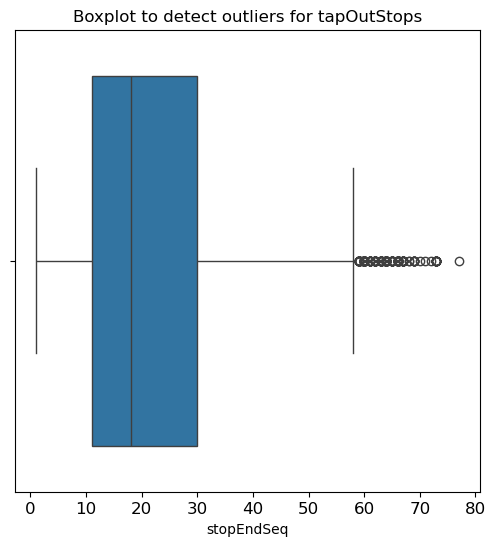

In [42]:
# Create a boxplot to visualize distribution of `tapOutStops` and detect any outliers.
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tapOutStops', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['stopEndSeq'])
plt.show()